# Coding the Emergence of Connectedness
### We are going to show that a completely disconnected graph with zero edges on adding 'n logn' edges on an average, becomes connected. 
***

Importing all the dependancies

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

***
Lets create a function to visualise the graph

In [3]:
def Visualise(G):
    nx.draw(G,with_labels=True)

***
Lets create a function which creates an empty graph with n vertices.

In [4]:
def CreateGraphWithnNodes(n):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    return G

***
Lets create a function which adds random edges.

In [5]:
def AddRandomEdge(G):
    u = random.choice(list(G.nodes()))
    v = random.choice(list(G.nodes()))
    if (u!=v):
        G.add_edge(u,v)
    return G

***
Lets create a function which adds random edges until the graph becomes connected.

In [6]:
def AddEdgesUntilConnected(G):
    while(nx.is_connected(G)==False):
        G = AddRandomEdge(G)
    return G

***
Lets create a function which returns the number of edges required to be added to connect a graph with n nodes.

In [7]:
def MinimumEdges(n):
    G = CreateGraphWithnNodes(n)
    G = AddEdgesUntilConnected(G)
    return G.number_of_edges()

***
Lets create a function which plots the minimum edges to be added vs number of nodes

In [8]:
def PlotNumEdgesVsNumNodes():
    x = []
    y = []
    i = 10
    while i<500:
        x.append(i)
        y.append(MinimumEdges(i))
        i=i+5
    plt.xlabel('Number of Nodes')
    plt.ylabel('Minimum Edges to add')
    plt.title('Emergence of Connectedness')
    plt.plot(x,y)
    plt.show()

*** 
Now let us try the above function and see how the plot turns out.

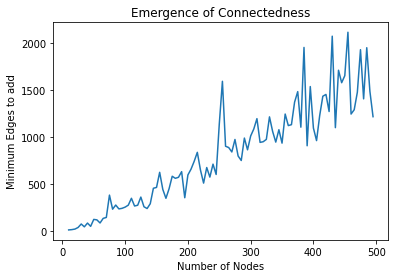

In [9]:
PlotNumEdgesVsNumNodes()

We can see that the graph has a lot of noise.<br><br>So lets take the average over a few number of times for each value of number of nodes.

In [10]:
def AverageEdgesToAdd(Number_of_nodes,n):#n is the number of times over which we want to calculate the average
    NumEdges = []
    for i in range(n):
        NumEdges.append(MinimumEdges(Number_of_nodes))
    return np.average(NumEdges)

***
Now lets plot the graph again with the average taken.

In [11]:
def PlotAverageNumEdges():
    x = []
    y = []
    i = 10
    while i<500:
        x.append(i)
        y.append(AverageEdgesToAdd(i,10))#taking an average over 10 times
        i=i+5
    plt.xlabel('Number of Nodes')
    plt.ylabel('Minimum Edges to add')
    plt.title('Emergence of Connectedness')
    plt.plot(x,y)
    plt.show()

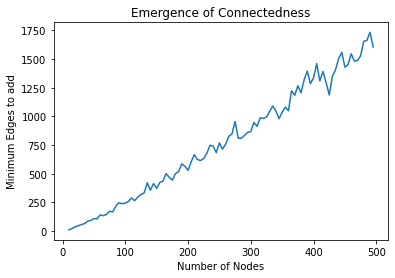

In [12]:
PlotAverageNumEdges()

***
Now let us compare the given plot with that of the function n log n

In [83]:
def CompareWithnlogn():
    x=[]
    x1=[]
    y=[]
    y1=[]
    i = 10
    while i<500:
        x.append(i)
        x1.append(i)
        y.append(AverageEdgesToAdd(i,10))#taking an average over 10 times
        y1.append(i*np.log(i))
        i=i+5
    plt.xlabel('Number of Nodes')
    plt.ylabel('Minimum Edges to add')
    plt.title('Emergence of Connectedness')
    plt.plot(x,y)
    plt.plot(x1,y1)
    plt.show()

Lets try the function out..<br>
It will take quite some time but hang tight!

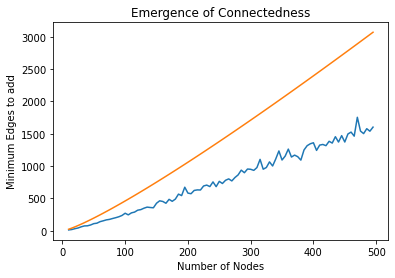

In [84]:
CompareWithnlogn()

Almost there!<br>
But how to find a perfect match?<br>
Lets try the plot again with (n log n)/2
***

In [86]:
def CompareWithnlognby2():
    x=[]
    x1=[]
    y=[]
    y1=[]
    i = 10
    while i<500:
        x.append(i)
        x1.append(i)
        y.append(AverageEdgesToAdd(i,10))#taking an average over 10 times
        y1.append(i*np.log(i)/2)
        i=i+5
    plt.xlabel('Number of Nodes')
    plt.ylabel('Minimum Edges to add')
    plt.title('Emergence of Connectedness')
    plt.plot(x,y)
    plt.plot(x1,y1)
    plt.show()

Lets try it again for one last time! 

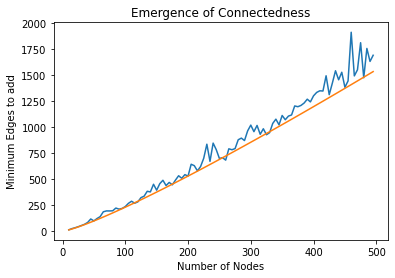

In [88]:
CompareWithnlognby2()

There we go!<br>
That was a close match!
***
<div class="alert alert-block alert-info">
<b>Conclusion:</b> If we add edges of the order (n log n)to an empty graph, the graph will ultimately get connected!
</div>